C:\Users\KRISHNENDU\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.895e+00, tolerance: 1.574e-03
  model = cd_fast.enet_coordinate_descent(


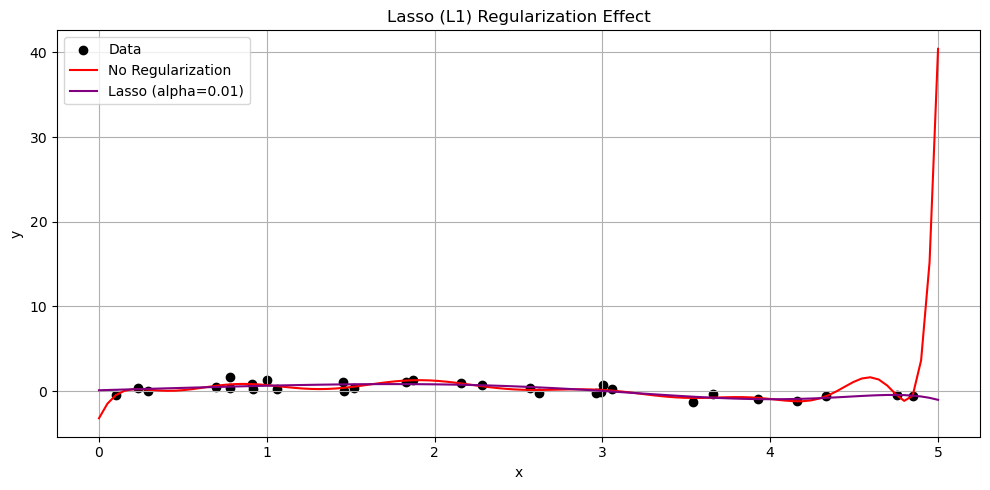

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic noisy data
np.random.seed(42)
n_samples = 30
X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(n_samples) * 0.5  # sin + noise

# Polynomial degree
degree = 15

# No regularization
model_no_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_no_reg.fit(X, y)

# With L1 (Lasso) regularization
alpha = 0.01  # L1 strength
model_lasso = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha, max_iter=10000))
model_lasso.fit(X, y)

# Prediction grid
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred_no_reg = model_no_reg.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)

# Plot: Fits
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_test, y_pred_no_reg, color='red', label='No Regularization')
plt.plot(X_test, y_pred_lasso, color='purple', label=f'Lasso (alpha={alpha})')
plt.title("Lasso (L1) Regularization Effect")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
